## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

import numpy as np

In [2]:
# Import the Data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [3]:
import pandas as pd 
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [4]:
# Normalize the data
from sklearn.preprocessing import Normalizer

normer = Normalizer()
normer.fit(X_train)

X_train = normer.transform(X_train)
X_test = normer.transform(X_test)

In [5]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
# Import layers and models from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
boston_model = Sequential()

# Hidden Layer
boston_model.add(Dense(7, input_dim=13, activation='linear'))

# Hidden Layer
boston_model.add(Dense(7, activation='relu'))

# Output layer
boston_model.add(Dense(1, activation='linear'))

# Compile
boston_model.compile(loss='mse',
                     optimizer='adam',
                     metrics=['mean_squared_error'])

boston_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit model
history = boston_model.fit(X_train, y_train,
                          batch_size=32, 
                          epochs=50, 
                          validation_split=0.1,
                          verbose=0)

Instructions for updating:
Use tf.cast instead.


In [11]:
scores = boston_model.evaluate(X_train, y_train)

404/404 [==============================] - 0s 259us/sample - loss: 78.2162 - mean_squared_error: 78.2162


In [12]:
print(f'{boston_model.metrics_names[1]}: {scores[1]}')

mean_squared_error: 78.21619415283203


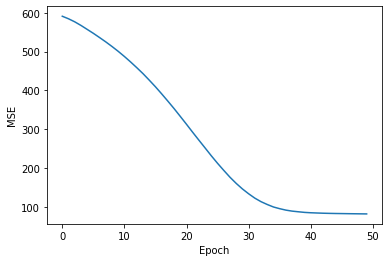

In [111]:
import matplotlib.pyplot as plt

loss_history = history.history['loss']

plt.plot(loss_history)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [112]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'lr mse: {mse}')

lr mse: 18.165504455566406


## Feature Engineering

In [113]:
# Feature Engineering
def add_features(X):
    X = pd.DataFrame(X)
    X['age_room'] = X[5] + X[6]
    X['tax_ptratio'] = X[9] + X[10]
    return X.values

X_train = add_features(X_train)
X_test = add_features(X_test)

In [114]:
X_train.shape, X_test.shape

((404, 15), (102, 15))

In [115]:
boston_eng_model = Sequential()

# Hidden Layer
boston_eng_model.add(Dense(16, input_dim=15, activation='relu'))

# Hidden Layer
boston_eng_model.add(Dense(16, activation='relu'))

# Output layer
boston_eng_model.add(Dense(1, activation='relu'))

# Compile
boston_eng_model.compile(loss='mse',
                     optimizer='adam',
                     metrics=['mean_squared_error'])

boston_eng_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Fit model
history = boston_eng_model.fit(X_train, y_train,
                          batch_size=32, 
                          epochs=50, 
                          validation_split=0.1,
                          verbose=0)

In [117]:
scores = boston_eng_model.evaluate(X_train, y_train)

404/404 [==============================] - 0s 67us/sample - loss: 586.1605 - mean_squared_error: 586.1604


In [118]:
print(f'{boston_eng_model.metrics_names[1]}: {scores[1]}')

mean_squared_error: 586.160400390625


In [119]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'lr mse: {mse}')

lr mse: 18.16545867919922


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [80]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 3s 1us/step


In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [83]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [84]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [85]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [92]:
fashion_model = Sequential()

fashion_model.add(Dense(16, input_dim=784, activation='relu'))
fashion_model.add(Dense(16, activation='relu'))

fashion_model.add(Dense(10, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = fashion_model.fit(X_train, 
                    y_train,
                    batch_size=32,
                    epochs=50, 
                    validation_split=0.1,
                    verbose=0)

In [95]:
fashion_model.evaluate(X_test, y_test)
print(f'{fashion_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 55us/sample - loss: 4.4417 - acc: 0.7240
acc: 8959.08432006836


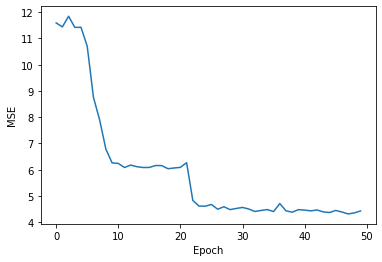

In [96]:
loss_history = history.history['loss']

plt.plot(loss_history)
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.